## Imports and Setup

In [ ]:
#!git clone https://github.com/GFDRR/disaster-fcv-colocation-mapping.git
#%cd disaster-fcv-colocation-mapping
#!apt-get update && apt-get install -y --no-install-recommends gdal-bin
#!pip install -r requirements.txt

In [1]:
import os 
os.chdir('../')
from utils import data_download
from utils import data_utils
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

%load_ext autoreload
%autoreload 2

## Parameters

In [75]:
iso_code = "MMR"
adm_level = "ADM3"
acled_start_date = "2021-01-01"
acled_config_file = "configs/acled_credentials.yaml"

## Download Datasets

In [78]:
dm = data_download.DatasetManager(
    iso_code, 
    acled_key=acled_config["ACLED_key"], 
    acled_email=acled_config["ACLED_email"], 
    acled_start_date=acled_start_date
)
data = dm.generate_datasets()
data.sort_values("mhs_dfcv_conflict_exposure_relative", ascending=False).head(3)

INFO:root:Downloading geoboundary for MMR...
INFO:root:Geoboundary file saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\MMR\MMR_ADM3.geojson.
INFO:root:(1/4) Downloading worldpop...
INFO:root:Data saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\MMR\MMR_WORLDPOP_ADM3.geojson.
INFO:pyogrio._io:Created 330 records
INFO:root:(2/4) Downloading global_earthquake...
INFO:root:Data saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\MMR\MMR_EARTHQUAKE_ADM3.geojson.
INFO:pyogrio._io:Created 330 records
INFO:root:Data saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\MMR\MMR_EARTHQUAKE_EXPOSURE_ADM3.geojson.
INFO:pyogrio._io:Created 330 records
INFO:root:(3/4) Downloading global_landslide...
INFO:root:Data saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\colocation-mapping\data\MMR\MMR_LANDSLIDE_ADM3.geojson.
INFO:pyogrio._io:Created 330 records
INFO:root:Data saved to C:\Users\Isabelle\Documents\GFDRR\dfcv\

,iso_code,ADM3,ADM3_ID,worldpop,earthquake,earthquake_exposure,landslide,landslide_exposure,cyclone,cyclone_exposure,geometry,coastal_defended,coastal_defended_exposure,fluvial_defended,fluvial_defended_exposure,pluvial_defended,pluvial_defended_exposure,population_best,conflict_count,null_conflict_count,conflict_exposure,dfcv_conflict_exposure,earthquake_exposure_relative,landslide_exposure_relative,cyclone_exposure_relative,coastal_defended_exposure_relative,fluvial_defended_exposure_relative,pluvial_defended_exposure_relative,conflict_exposure_relative,dfcv_conflict_exposure_relative,mhs_exposure_relative,mhs_dfcv_conflict_exposure_relative,mhs_exposure,mhs_dfcv_conflict_exposure
230,MMR,Amarapura,66882298B63555975911592,249937.406250,0.355947,249937.406250,2.101538,50206.699219,96.283745,249937.406250,"POLYGON ((96.04233 21.941, 96.03628 21.93495, ...",0.000000,0.0000,0.270039,149562.31250,0.005017,2401.314697,3275163.0,158.0,37.0,27067.462810,246869.218750,1.0,0.200877,1.0,0.000000,0.598399,0.009608,0.108297,0.987724,0.561777,0.554880,140409.027783,3.466267e+10
134,MMR,Myaung,66882298B46112702196623,116488.015625,0.203830,116488.015625,2.000000,0.000000,107.695119,116488.015625,"POLYGON ((95.41597 21.74381, 95.41614 21.74552...",0.000000,0.0000,0.270860,79708.46875,0.004467,1334.455688,1514379.0,585.0,128.0,3313.739606,116488.015625,1.0,0.000000,1.0,0.000000,0.684263,0.011456,0.028447,1.000000,0.539144,0.539144,62803.791138,7.315889e+09
130,MMR,Hlaingtharya,66882298B54341055682393,851881.250000,0.217054,851881.250000,1.000000,0.000000,116.517555,851881.250000,"POLYGON ((96.07177 16.92943, 96.0679 16.93314,...",0.270933,608804.3125,0.352682,590565.37500,0.000617,800.041504,56290068.0,329.0,68.0,215670.758621,851830.375000,1.0,0.000000,1.0,0.714659,0.693248,0.000939,0.253170,0.999940,0.538838,0.538805,459025.583301,3.910119e+11


## Visualize Data

<Axes: >

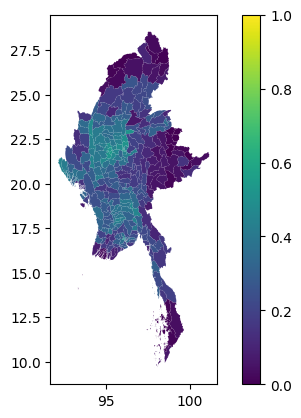

In [79]:
data.plot("mhs_dfcv_conflict_exposure_relative", legend=True, vmin=0, vmax=1)